In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer


In [84]:
td = pd.read_csv('/Users/sbp/Downloads/twitterdata.csv')

In [85]:
td.shape

(2160, 14)

In [86]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date                 2160 non-null   object
 1   tweet                2160 non-null   object
 2   lang                 2160 non-null   object
 3   retweetCount         2160 non-null   int64 
 4   likeCount            2160 non-null   int64 
 5   replyCount           2160 non-null   int64 
 6   username             2160 non-null   object
 7   user_followersCount  2160 non-null   int64 
 8   user_friendsCount    2160 non-null   int64 
 9   verifiedStatus       2160 non-null   bool  
 10  tweet_url            2160 non-null   object
 11  hastags              453 non-null    object
 12  chr_count            2160 non-null   int64 
 13  topic                2160 non-null   object
dtypes: bool(1), int64(6), object(7)
memory usage: 221.6+ KB


In [87]:
#check for missing values
td.isnull().values.any()

True

In [88]:
#Find the sum of missing values in the dataset
td.isnull().sum()

date                      0
tweet                     0
lang                      0
retweetCount              0
likeCount                 0
replyCount                0
username                  0
user_followersCount       0
user_friendsCount         0
verifiedStatus            0
tweet_url                 0
hastags                1707
chr_count                 0
topic                     0
dtype: int64

In [89]:
#Percentage of missing values
def perc_missing(df):
    '''prints out columns with missing values with its %'''
    for col in df.columns:
        pct = df[col].isna().mean() * 100
        if (pct != 0):
            print('{} => {}%'.format(col, round(pct, 2)))
    
perc_missing(td)

hastags => 79.03%


In [90]:
#Check for the duplicates
td.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2155    False
2156    False
2157    False
2158    False
2159    False
Length: 2160, dtype: bool

In [91]:
newtd = td.drop(['hastags','verifiedStatus','tweet_url','lang','replyCount','chr_count','user_friendsCount'], axis=1)


In [92]:
#Find the sum of missing values in the dataset
newtd.columns

Index(['date', 'tweet', 'retweetCount', 'likeCount', 'username',
       'user_followersCount', 'topic'],
      dtype='object')

In [93]:
#Find the sum of missing values in the dataset
newtd.isnull().sum()

date                   0
tweet                  0
retweetCount           0
likeCount              0
username               0
user_followersCount    0
topic                  0
dtype: int64

In [94]:
newtd.head()

,date,tweet,retweetCount,likeCount,username,user_followersCount,topic
0,2022-11-01,#JuciedUpp The ‘ON’ cycle is the period in whi...,0,0,2621965marcos,1560,supplements
1,2022-11-01,@CuckPuke Only buy supplements from https://t....,0,1,DoveManActual,237,supplements
2,2022-11-01,"Like It👍 from Vitamins, Minerals &amp; Supplem...",0,0,mieniaisacat,889,supplements
3,2022-11-01,"“""other tools"" such as Working for Families an...",0,0,delphijunkie,1485,supplements
4,2022-11-01,Why are vitamins so large?! Like I shouldn’t n...,0,1,CoCoCherrelle,549,supplements


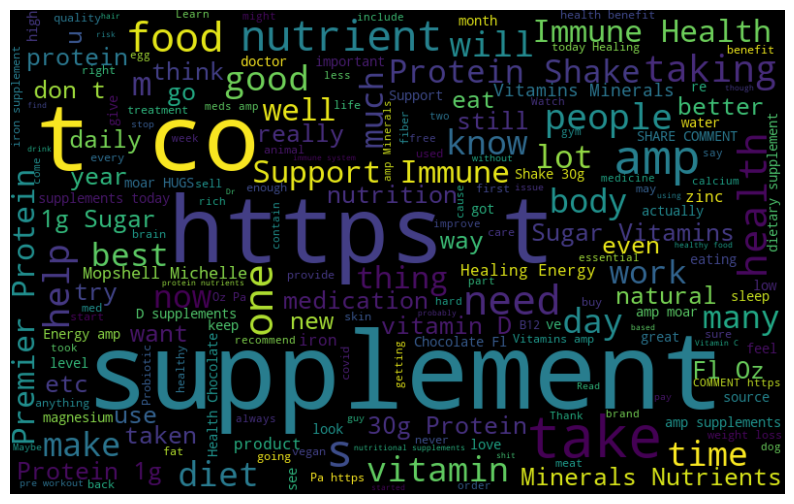

In [95]:
from wordcloud import WordCloud
all_words = ''.join([word for word in newtd['tweet']])
#building a wordcloud on the data from all tweets
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [96]:
def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)

newtd["tweet"] = newtd["tweet"].apply(remove_URL)


In [97]:
newtd["cleaned_tweet"] = newtd["tweet"].map(lambda x: re.sub(r"[^A-Za-z0-9]+", " ", x))
newtd

,date,tweet,retweetCount,likeCount,username,user_followersCount,topic,cleaned_tweet
0,2022-11-01,#JuciedUpp The ‘ON’ cycle is the period in whi...,0,0,2621965marcos,1560,supplements,JuciedUpp The ON cycle is the period in which...
1,2022-11-01,@CuckPuke Only buy supplements from,0,1,DoveManActual,237,supplements,CuckPuke Only buy supplements from
2,2022-11-01,"Like It👍 from Vitamins, Minerals &amp; Supplem...",0,0,mieniaisacat,889,supplements,Like It from Vitamins Minerals amp Supplements...
3,2022-11-01,"“""other tools"" such as Working for Families an...",0,0,delphijunkie,1485,supplements,other tools such as Working for Families and ...
4,2022-11-01,Why are vitamins so large?! Like I shouldn’t n...,0,1,CoCoCherrelle,549,supplements,Why are vitamins so large Like I shouldn t nea...
...,...,...,...,...,...,...,...,...
2155,2023-01-05,"@ISS_Research Fermented milk or kafir, yeast a...",0,0,Maanielmi,286,proteins health nutrients,ISS Research Fermented milk or kafir yeast an...
2156,2023-01-05,【Trend Health/Household】 Premier Protein Shake...,0,0,btrend_usa,3135,proteins health nutrients,Trend Health Household Premier Protein Shake ...
2157,2023-01-05,TLDR:\nHow can Jessica improve her bone health...,0,1,tanyagrenade,475,proteins health nutrients,TLDR How can Jessica improve her bone health E...
2158,2023-01-05,"Eating variety of fruits &amp; vegetables, who...",0,10,_jvvillar,21412,proteins health nutrients,Eating variety of fruits amp vegetables whole ...


In [98]:
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
lemmatized_output = ''.join([lemmatizer.lemmatize(w) for w in newtd['cleaned_tweet']])
print(lemmatized_output)

 JuciedUpp The ON cycle is the period in which you follow a certain program consistently usually lasting 4 8 or 12 weeks Click Juiced Upp Review Juiced Upp Does bodybuilding supplements really work via YouTube CuckPuke Only buy supplements from Like It from Vitamins Minerals amp Supplements in Amazon SalesRank No 4 Doctor s Best High Absorption Magnesium Doctor s Best High Absorption Magnesium supports bone density hel  other tools such as Working for Families and accommodation supplements Paid for how By your tax cuts for the wealthy The core part of National s tax policy was to inflation adjust tax thresholds Great Do that But dropping the top 39 tax rate is NOT this Why are vitamins so large Like I shouldn t nearly choke trying to get these supplements inSHARPEN YOUR SENSES amp ROLL BACK THE CLOCK Grab The Biggest Savings On Life Extensions most popular vitamins amp supplements geared for people over forty Use Code AFFBEST Free Shipping over 50 Founded in 1980 to extend the healthy 

In [100]:
from nltk.tokenize import RegexpTokenizer
regexp = RegexpTokenizer(r"\w+")
newtd['cleaned_tweet']=newtd['cleaned_tweet'].apply(regexp.tokenize)
newtd.head()

,date,tweet,retweetCount,likeCount,username,user_followersCount,topic,cleaned_tweet
0,2022-11-01,#JuciedUpp The ‘ON’ cycle is the period in whi...,0,0,2621965marcos,1560,supplements,"[JuciedUpp, The, ON, cycle, is, the, period, i..."
1,2022-11-01,@CuckPuke Only buy supplements from,0,1,DoveManActual,237,supplements,"[CuckPuke, Only, buy, supplements, from]"
2,2022-11-01,"Like It👍 from Vitamins, Minerals &amp; Supplem...",0,0,mieniaisacat,889,supplements,"[Like, It, from, Vitamins, Minerals, amp, Supp..."
3,2022-11-01,"“""other tools"" such as Working for Families an...",0,0,delphijunkie,1485,supplements,"[other, tools, such, as, Working, for, Familie..."
4,2022-11-01,Why are vitamins so large?! Like I shouldn’t n...,0,1,CoCoCherrelle,549,supplements,"[Why, are, vitamins, so, large, Like, I, shoul..."


In [103]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
py_stem = PorterStemmer()
py_words = newtd['cleaned_tweet']
for word in py_words :
    print(word)

['JuciedUpp', 'The', 'ON', 'cycle', 'is', 'the', 'period', 'in', 'which', 'you', 'follow', 'a', 'certain', 'program', 'consistently', 'usually', 'lasting', '4', '8', 'or', '12', 'weeks', 'Click', 'Juiced', 'Upp', 'Review', 'Juiced', 'Upp', 'Does', 'bodybuilding', 'supplements', 'really', 'work', 'via', 'YouTube']
['CuckPuke', 'Only', 'buy', 'supplements', 'from']
['Like', 'It', 'from', 'Vitamins', 'Minerals', 'amp', 'Supplements', 'in', 'Amazon', 'SalesRank', 'No', '4', 'Doctor', 's', 'Best', 'High', 'Absorption', 'Magnesium', 'Doctor', 's', 'Best', 'High', 'Absorption', 'Magnesium', 'supports', 'bone', 'density', 'hel']
['other', 'tools', 'such', 'as', 'Working', 'for', 'Families', 'and', 'accommodation', 'supplements', 'Paid', 'for', 'how', 'By', 'your', 'tax', 'cuts', 'for', 'the', 'wealthy', 'The', 'core', 'part', 'of', 'National', 's', 'tax', 'policy', 'was', 'to', 'inflation', 'adjust', 'tax', 'thresholds', 'Great', 'Do', 'that', 'But', 'dropping', 'the', 'top', '39', 'tax', 'rat

In [104]:
#stopword = nltk.corpus.stopwords.words('english')
import gensim
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
def remove_stopwords(text):
    text = [word for word in text if word not in STOPWORDS]
    return text
    
newtd['cleaned_tweet'] = newtd['cleaned_tweet'].apply(lambda x: remove_stopwords(x))
newtd.head(10)

,date,tweet,retweetCount,likeCount,username,user_followersCount,topic,cleaned_tweet
0,2022-11-01,#JuciedUpp The ‘ON’ cycle is the period in whi...,0,0,2621965marcos,1560,supplements,"[JuciedUpp, The, ON, cycle, period, follow, ce..."
1,2022-11-01,@CuckPuke Only buy supplements from,0,1,DoveManActual,237,supplements,"[CuckPuke, Only, buy, supplements]"
2,2022-11-01,"Like It👍 from Vitamins, Minerals &amp; Supplem...",0,0,mieniaisacat,889,supplements,"[Like, It, Vitamins, Minerals, amp, Supplement..."
3,2022-11-01,"“""other tools"" such as Working for Families an...",0,0,delphijunkie,1485,supplements,"[tools, Working, Families, accommodation, supp..."
4,2022-11-01,Why are vitamins so large?! Like I shouldn’t n...,0,1,CoCoCherrelle,549,supplements,"[Why, vitamins, large, Like, I, shouldn, t, ne..."
5,2022-11-01,SHARPEN YOUR SENSES &amp; ROLL BACK THE CLOCK!...,0,0,TomD31977191,228,supplements,"[SHARPEN, YOUR, SENSES, amp, ROLL, BACK, THE, ..."
6,2022-11-01,"""Luxon... noted the government had 'other tool...",51,296,nealejones,18719,supplements,"[Luxon, noted, government, tools, Working, Fam..."
7,2022-11-01,@shanamermaidl he’s now very into “creatine” a...,0,0,weevilbabe,336,supplements,"[shanamermaidl, s, creatine, supplements]"
8,2022-11-01,(I am very lucky that this is my biggest compl...,0,1,johubris,1227,supplements,"[I, lucky, biggest, complaint, today, Apart, h..."
9,2022-11-01,Vitamins &amp; Supplements\nLife Extension - B...,0,1,TomD31977191,228,supplements,"[Vitamins, amp, Supplements, Life, Extension, ..."


In [105]:
newtd["tweet_"] = newtd["tweet"].apply(lambda x: "".join(x))

In [106]:
newtd

,date,tweet,retweetCount,likeCount,username,user_followersCount,topic,cleaned_tweet,tweet_
0,2022-11-01,#JuciedUpp The ‘ON’ cycle is the period in whi...,0,0,2621965marcos,1560,supplements,"[JuciedUpp, The, ON, cycle, period, follow, ce...",#JuciedUpp The ‘ON’ cycle is the period in whi...
1,2022-11-01,@CuckPuke Only buy supplements from,0,1,DoveManActual,237,supplements,"[CuckPuke, Only, buy, supplements]",@CuckPuke Only buy supplements from
2,2022-11-01,"Like It👍 from Vitamins, Minerals &amp; Supplem...",0,0,mieniaisacat,889,supplements,"[Like, It, Vitamins, Minerals, amp, Supplement...","Like It👍 from Vitamins, Minerals &amp; Supplem..."
3,2022-11-01,"“""other tools"" such as Working for Families an...",0,0,delphijunkie,1485,supplements,"[tools, Working, Families, accommodation, supp...","“""other tools"" such as Working for Families an..."
4,2022-11-01,Why are vitamins so large?! Like I shouldn’t n...,0,1,CoCoCherrelle,549,supplements,"[Why, vitamins, large, Like, I, shouldn, t, ne...",Why are vitamins so large?! Like I shouldn’t n...
...,...,...,...,...,...,...,...,...,...
2155,2023-01-05,"@ISS_Research Fermented milk or kafir, yeast a...",0,0,Maanielmi,286,proteins health nutrients,"[ISS, Research, Fermented, milk, kafir, yeast,...","@ISS_Research Fermented milk or kafir, yeast a..."
2156,2023-01-05,【Trend Health/Household】 Premier Protein Shake...,0,0,btrend_usa,3135,proteins health nutrients,"[Trend, Health, Household, Premier, Protein, S...",【Trend Health/Household】 Premier Protein Shake...
2157,2023-01-05,TLDR:\nHow can Jessica improve her bone health...,0,1,tanyagrenade,475,proteins health nutrients,"[TLDR, How, Jessica, improve, bone, health, Ea...",TLDR:\nHow can Jessica improve her bone health...
2158,2023-01-05,"Eating variety of fruits &amp; vegetables, who...",0,10,_jvvillar,21412,proteins health nutrients,"[Eating, variety, fruits, amp, vegetables, gra...","Eating variety of fruits &amp; vegetables, who..."


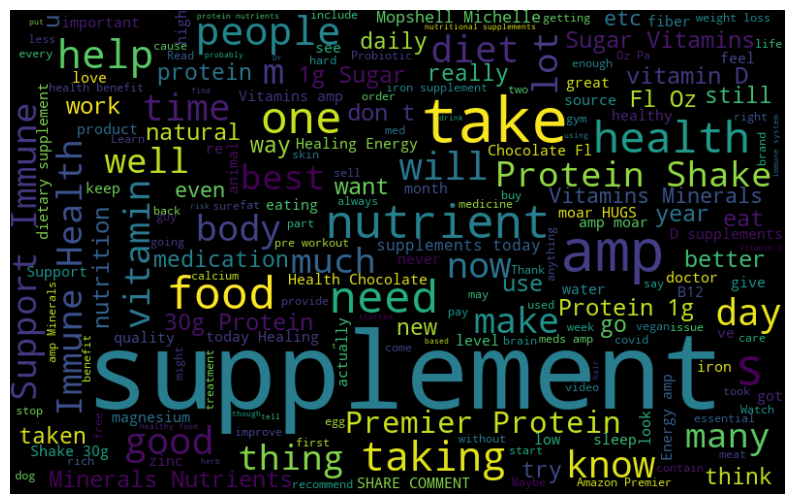

In [107]:
#building a wordcloud on the data from all tweets
from wordcloud import WordCloud
all_words = ''.join([word for word in newtd['tweet_']])
#building a wordcloud on the data from all tweets
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [108]:
newtd.head()

,date,tweet,retweetCount,likeCount,username,user_followersCount,topic,cleaned_tweet,tweet_
0,2022-11-01,#JuciedUpp The ‘ON’ cycle is the period in whi...,0,0,2621965marcos,1560,supplements,"[JuciedUpp, The, ON, cycle, period, follow, ce...",#JuciedUpp The ‘ON’ cycle is the period in whi...
1,2022-11-01,@CuckPuke Only buy supplements from,0,1,DoveManActual,237,supplements,"[CuckPuke, Only, buy, supplements]",@CuckPuke Only buy supplements from
2,2022-11-01,"Like It👍 from Vitamins, Minerals &amp; Supplem...",0,0,mieniaisacat,889,supplements,"[Like, It, Vitamins, Minerals, amp, Supplement...","Like It👍 from Vitamins, Minerals &amp; Supplem..."
3,2022-11-01,"“""other tools"" such as Working for Families an...",0,0,delphijunkie,1485,supplements,"[tools, Working, Families, accommodation, supp...","“""other tools"" such as Working for Families an..."
4,2022-11-01,Why are vitamins so large?! Like I shouldn’t n...,0,1,CoCoCherrelle,549,supplements,"[Why, vitamins, large, Like, I, shouldn, t, ne...",Why are vitamins so large?! Like I shouldn’t n...


<AxesSubplot:>

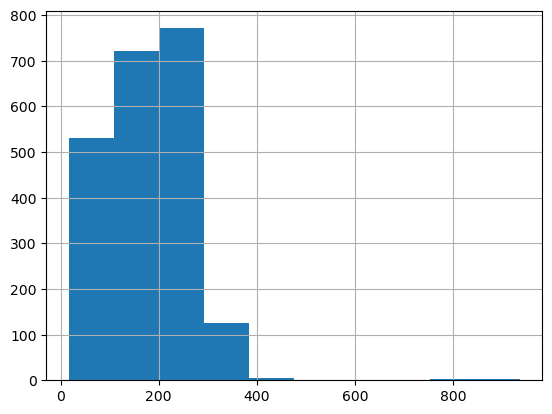

In [109]:
#Character count in the tweets 
newtd['tweet_'].str.len().hist()

<AxesSubplot:>

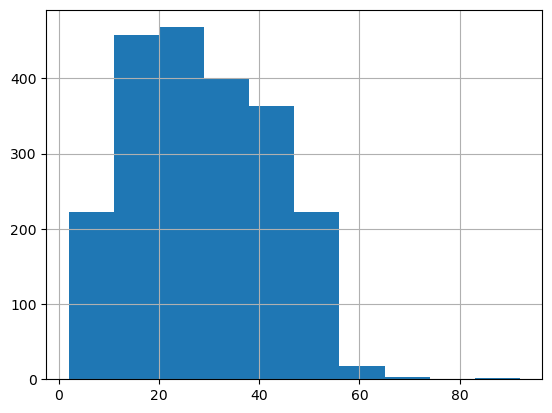

In [110]:
#word count int he given tweet
newtd['tweet_'].str.split().map(lambda x: len(x)).hist()

In [111]:
newtd['length'] = newtd['tweet_'].apply(len)


<AxesSubplot:>

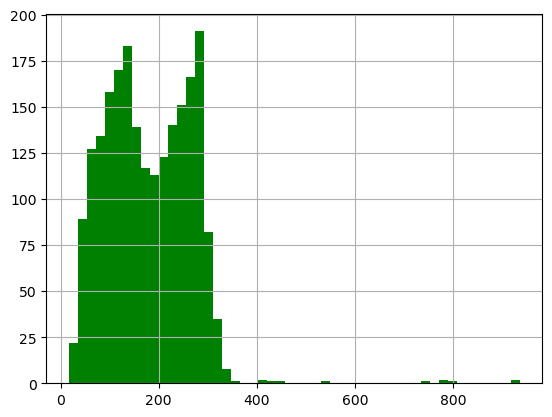

In [112]:
#Taking a look at the distribution of the text lengths
newtd['length'].hist(bins = 50, color = 'g')


In [113]:
#print(tfid.get_feature_names())
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=20)

count_train = count_vec.fit(newtd['tweet_'])
bag_of_words = count_vec.transform(newtd['tweet_'])
count_array = bag_of_words.toarray()

count_vect_df = pd.DataFrame(data=count_array,columns = count_vec.get_feature_names())
print(count_vec.get_feature_names())
count_vect_df

['amp', 'diet', 'don', 'food', 'good', 'health', 'healthy', 'help', 'immune', 'just', 'like', 'need', 'nutrients', 'people', 'protein', 'supplements', 'support', 'taking', 'vitamin', 'vitamins']


/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,amp,diet,don,food,good,health,healthy,help,immune,just,like,need,nutrients,people,protein,supplements,support,taking,vitamin,vitamins
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2156,0,0,0,0,0,2,0,0,1,0,0,0,1,0,2,0,1,0,0,1
2157,0,2,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0
2158,4,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidvec=TfidfVectorizer(analyzer='word', stop_words="english",ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=20)
tfidvec_df = tfidvec.fit_transform(newtd['tweet_'])
txt = tfidvec_df.toarray()
count_vect_tdidf = pd.DataFrame(data=txt,columns = tfidvec.get_feature_names_out())
count_vect_tdidf

,amp,diet,don,food,good,health,healthy,help,immune,just,like,need,nutrients,people,protein,supplements,support,taking,vitamin,vitamins
0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.000000
1,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.000000
2,0.528479,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.584162,0.0,0.000000,0.0,0.000000,0.206756,0.000000,0.0,0.000000,0.580273
3,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.000000,0.000000
4,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.688102,0.0,0.000000,0.0,0.000000,0.243544,0.000000,0.0,0.000000,0.683521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2155,0.000000,0.000000,0.0,0.000000,0.0,0.517531,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.604705,0.0,0.605387,0.000000,0.000000,0.0,0.000000,0.000000
2156,0.000000,0.000000,0.0,0.000000,0.0,0.483253,0.000000,0.0,0.374159,0.0,0.000000,0.0,0.282327,0.0,0.565290,0.000000,0.366129,0.0,0.000000,0.305223
2157,0.000000,0.741995,0.0,0.000000,0.0,0.237419,0.371855,0.0,0.000000,0.0,0.000000,0.0,0.277411,0.0,0.277723,0.000000,0.000000,0.0,0.317352,0.000000
2158,0.876087,0.000000,0.0,0.000000,0.0,0.190379,0.298180,0.0,0.000000,0.0,0.000000,0.0,0.222447,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.240487


In [115]:
idf = tf.idf_
idf
# print(dict(zip(txt_fitted.get_feature_names(), idf)))
# print("\nWe see that the tokens 'sang','she' have the most idf weight because \
# they are the only tokens that appear in one document only.")
# print("\nThe token 'not' appears 6 times but it is also in all documents, so its idf is the lowest")

array([7.98471632, 6.48063892, 8.6778635 , ..., 8.6778635 , 8.6778635 ,
       8.6778635 ])

In [116]:
rr = dict(zip(txt_fitted.get_feature_names(), idf))
term_freq_df = pd.DataFrame(rr.items(),columns=['name','weight'])
term_freq_df.head()

/Users/sbp/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,name,weight
0,00,7.984716
1,000,6.480639
2,000mg,8.677864
3,01,8.677864
4,02,8.677864
